# **importing the necessary Python libraries and the dataset:**

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import pylab as pl
from sklearn.metrics import r2_score

In [223]:
df = pd.read_csv('C:\\Users\\AQ\\Downloads\\supply_chain_data.csv')

In [72]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# **Statistics for Numerical Columns**

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239830,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976920,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


# **Check for missing values in each column**

In [188]:
categorical_cols = [
    'Product type','Customer demographics', 'Shipping carriers',
    'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes'
]
for col in categorical_cols:
    print(f"\nDistribution of {col}:\n", df[col].value_counts())


Distribution of Product type:
 Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Distribution of Customer demographics:
 Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Distribution of Shipping carriers:
 Shipping carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

Distribution of Supplier name:
 Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

Distribution of Location:
 Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

Distribution of Inspection results:
 Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Distribution of Transportation modes:
 Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Distribution of Routes:
 Routes
Route

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [74]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [80]:
print(df.drop_duplicates(inplace=True))

None


### A new column titled 'Inventory Turnover' has been added to the dataset to assess inventory management effectiveness.

In [87]:
df['Inventory Turnover'] = df['Number of products sold'] / df['Stock levels']
print(df)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661

# **Deep Exploratory Analysis**

Product type
cosmetics    26
haircare     34
skincare     40
Name: Product type, dtype: int64


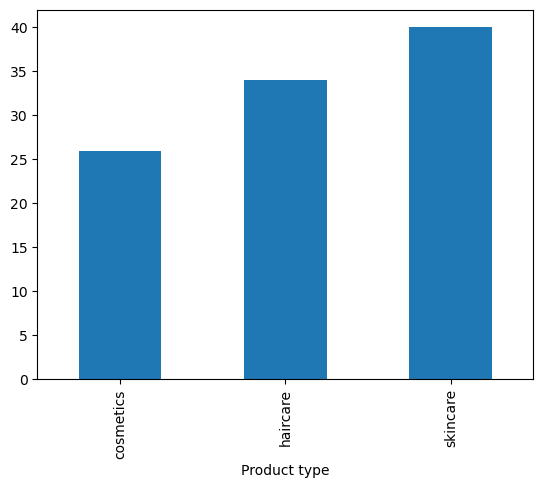

In [90]:
df.groupby(['Product type'])['Product type'].count().plot(kind='bar')
print(df.groupby(['Product type'])['Product type'].count())

# **Analyzing SKU**
## **Number of sold Skincare products by SKU**

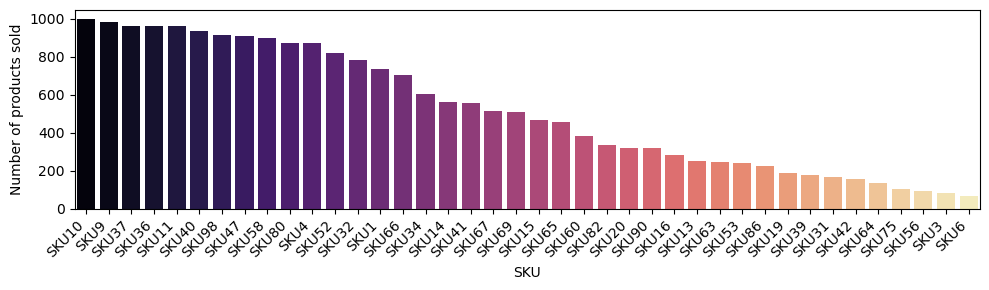

In [92]:
df_skincare = df[df['Product type'] == 'skincare'].sort_values(by=['Number of products sold'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 3))
colors = sns.color_palette("magma", n_colors=len(df_skincare))
sns.barplot(data=df_skincare, x='SKU', y='Number of products sold', ax=ax, hue='SKU', palette=colors, dodge=False)
ax.set_xticks(range(len(df_skincare['SKU']))) 
ax.set_xticklabels(df_skincare['SKU'], rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## **Number of sold cosmetics by SKU**

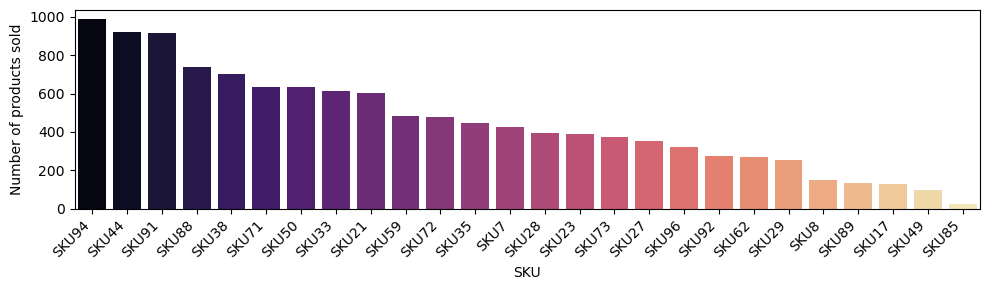

In [95]:
df_cosmetics = df[df['Product type'] == 'cosmetics'].sort_values(by=['Number of products sold'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 3))
colors = sns.color_palette("magma", n_colors=len(df_cosmetics))
sns.barplot(data=df_cosmetics, x='SKU', y='Number of products sold', ax=ax, hue='SKU', palette=colors, dodge=False)
ax.set_xticks(range(len(df_cosmetics['SKU'])))  
ax.set_xticklabels(df_cosmetics['SKU'], rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## **Number of sold Haircare products by SKU**

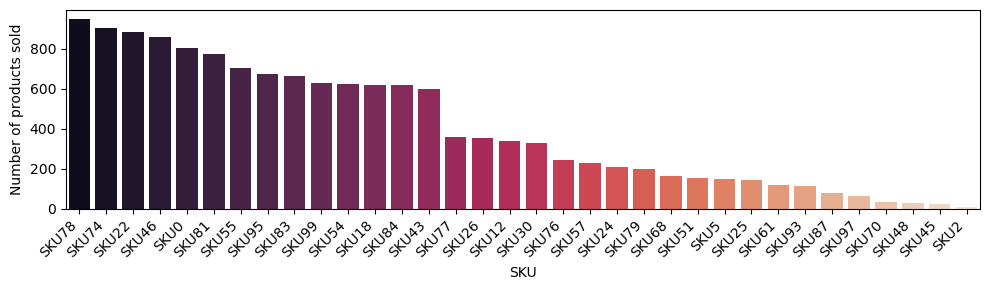

In [97]:
df_haircare = df[df['Product type'] == 'haircare'].sort_values(by=['Number of products sold'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 3))
colors = sns.color_palette("rocket", n_colors=len(df_haircare))
sns.barplot(data=df_haircare, x='SKU', y='Number of products sold', ax=ax, hue='SKU', palette=colors, dodge=False)
ax.set_xticks(range(len(df_haircare['SKU'])))  
ax.set_xticklabels(df_haircare['SKU'], rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## **Inventory Turnover Rate Per Product**

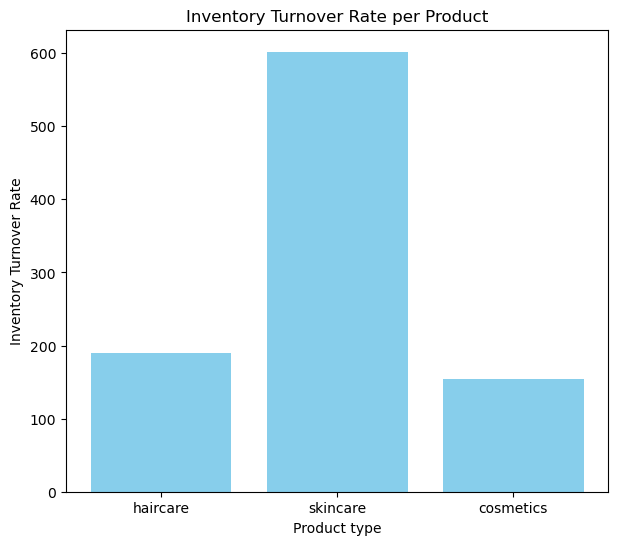

In [99]:
plt.figure(figsize=(7, 6))
plt.bar(df['Product type'], df['Inventory Turnover'], color='skyblue')
plt.title('Inventory Turnover Rate per Product')  
plt.xlabel('Product type')  
plt.ylabel('Inventory Turnover Rate')  
plt.show()

### The analysis indicates that skincare products have the highest inventory levels, reflecting strong demand and consumer interest in skincare solutions.

## **Sales by product type**

<function matplotlib.pyplot.show(close=None, block=None)>

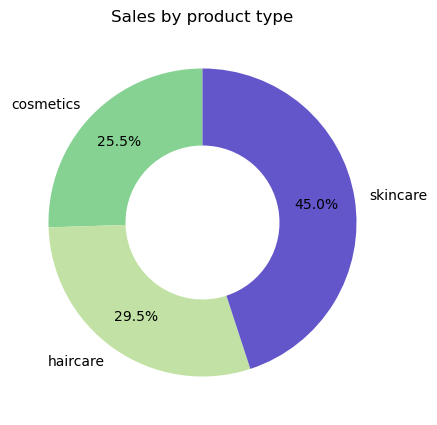

In [102]:
colors=['#86D293','#C1E2A4','#6256CA']
product_sales=df.groupby('Product type')['Number of products sold'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.pie(product_sales['Number of products sold'],
         labels=product_sales['Product type'],
         autopct='%1.1f%%',startangle=90, colors=colors ,wedgeprops=dict(width=0.5),pctdistance=0.75 )       
plt.title('Sales by product type')
plt.show

### Skincare products are the most preferred products as they are the highest in sales.

## **Total Revenue by City**

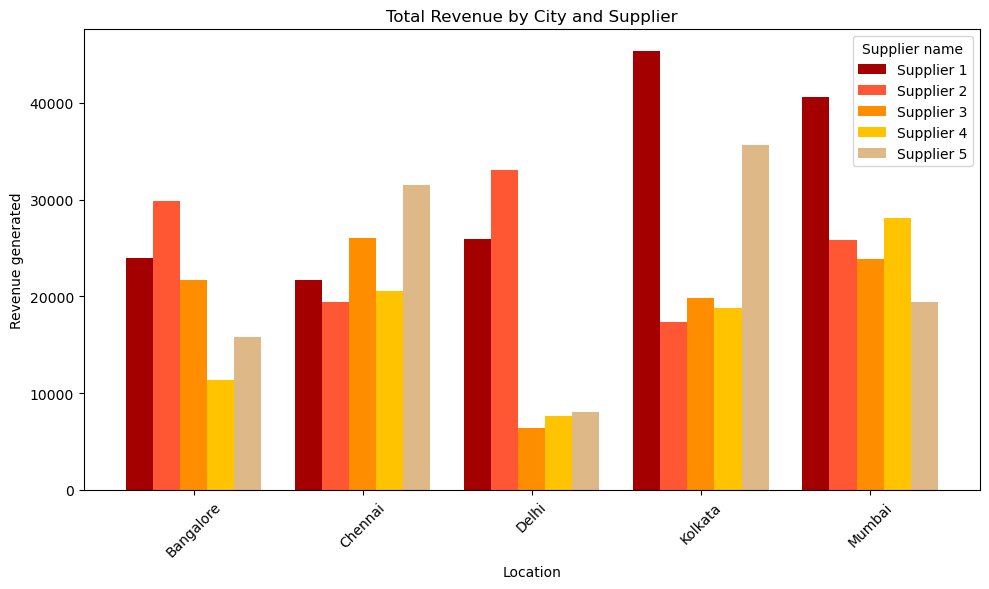

In [109]:
city_supplier_sales = df.groupby(['Location', 'Supplier name'])['Revenue generated'].sum().unstack().fillna(0)
colors = ['#A50000', '#FF5733', '#FF8D00', '#FFC300', '#DEB887']  
city_supplier_sales.plot(kind='bar', color=colors, figsize=(10,6), width=0.8)
plt.xlabel('Location')
plt.ylabel('Revenue generated')
plt.title('Total Revenue by City and Supplier')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Supplier 1 generates the highest revenue in the city of Kolkata.

## **Distribution of Product Prices by Location and Type**

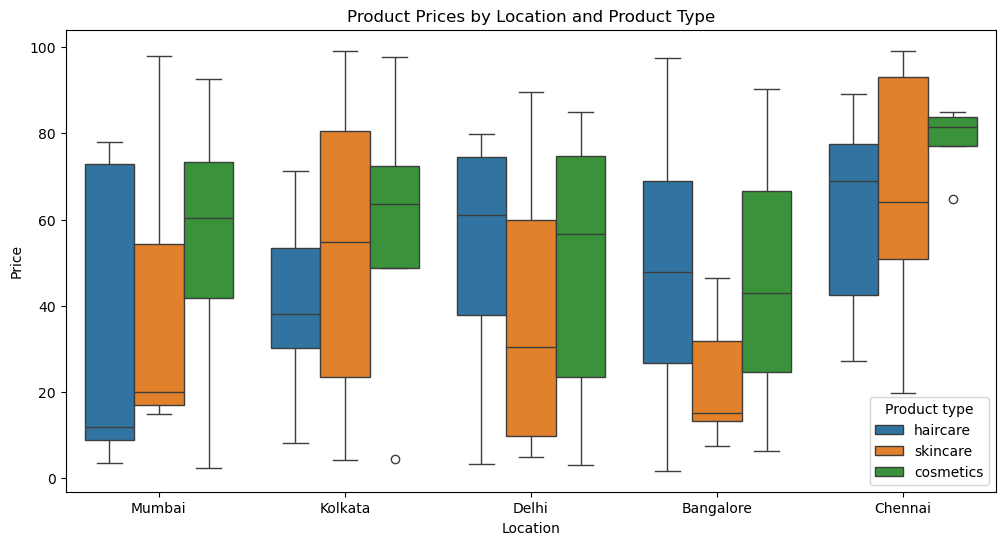

In [243]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df, x='Location', y='Price', hue='Product type')
plt.title('Product Prices by Location and Product Type')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

### When it comes to prices, Chennai leads in all the categories.

## **Total Revenue by product type**

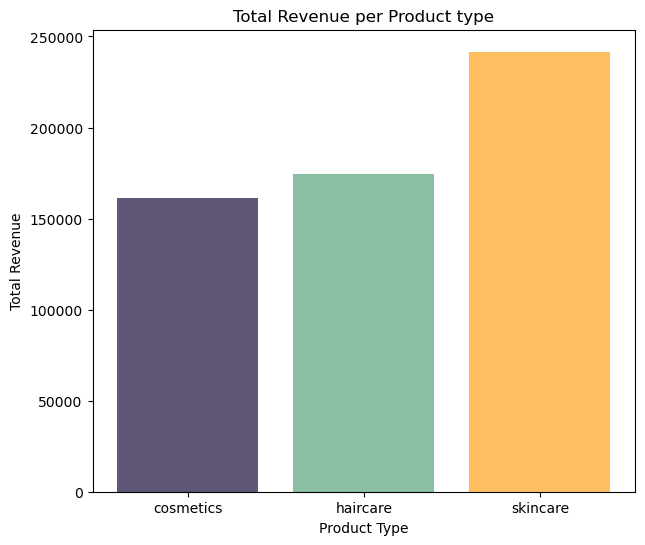

In [119]:
colors=['#605678','#8ABFA3','#FFBF61']
revenue_per_product = df.groupby('Product type')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(7, 6))
plt.bar(revenue_per_product['Product type'], revenue_per_product['Revenue generated'], color=colors)
plt.title('Total Revenue per Product type')  
plt.xlabel('Product Type') 
plt.ylabel('Total Revenue')  
plt.show()

### Skincare products generate the highest revenue.

## **Total Revenue by shipping carrier**

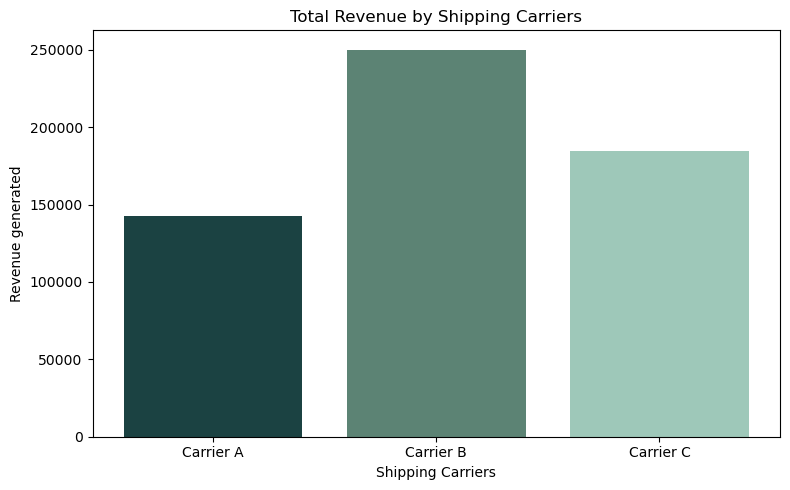

In [122]:
colors=['#1B4242','#5C8374','#9EC8B9']
carrier_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(carrier_revenue['Shipping carriers'],carrier_revenue['Revenue generated'], color=colors)
plt.xlabel('Shipping Carriers')
plt.ylabel('Revenue generated')
plt.title('Total Revenue by Shipping Carriers')
plt.tight_layout()
plt.show()

### The company use 3 Carriers for transportation and carrier B helps the company in generating more revenue.

## **Revenue distribution by customers demographics**

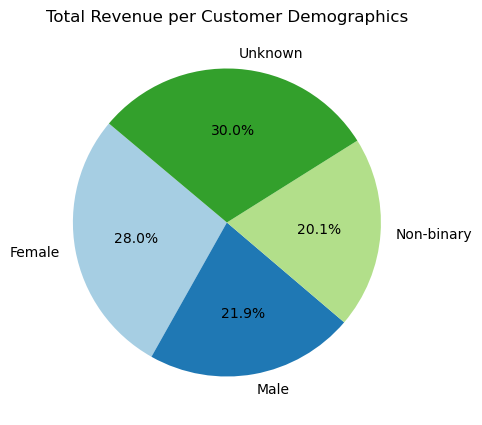

In [126]:
revenue_per_demographics = df.groupby('Customer demographics')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(5, 5))
plt.pie(revenue_per_demographics['Revenue generated'], labels=revenue_per_demographics['Customer demographics'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Revenue per Customer Demographics')  
plt.show()

### so 28% of total revenue comes from Femals & 21% comes from Males.

## **Analyzing Lead Time and Manufacturing cost**
### **Average lead time and Average Manufacturing Cost for all the products**

In [129]:
av_time=df.groupby('Product type')['Lead time'].mean().reset_index()
av_manufacturecost=df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
comb=pd.merge(av_time,av_manufacturecost ,on='Product type')
comb.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
comb   

,Product type,Average Lead Time,Average Manufacturing Costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


## **Total Quantity Sold by Transportation Mode**

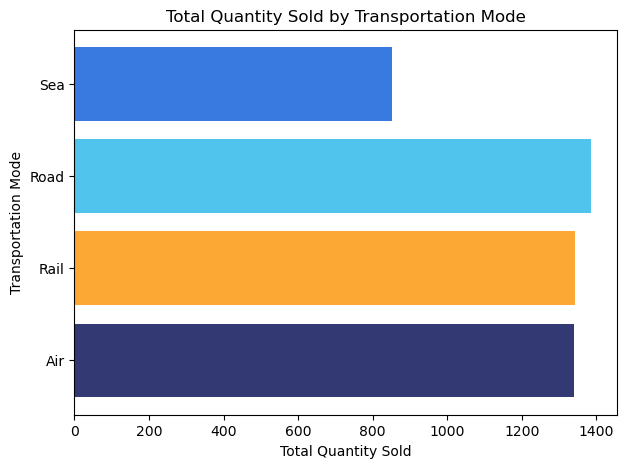

In [132]:
colors=['#333A73','#FBA834','#50C4ED','#387ADF']
usage_per_transportation = df.groupby('Transportation modes')['Order quantities'].sum().reset_index()
plt.figure(figsize=(7, 5))
plt.barh(usage_per_transportation['Transportation modes'], usage_per_transportation['Order quantities'],color=colors )
plt.title('Total Quantity Sold by Transportation Mode') 
plt.xlabel('Total Quantity Sold')  
plt.ylabel('Transportation Mode') 
plt.show()

## **Cost Distribution by Transportation Modes**	

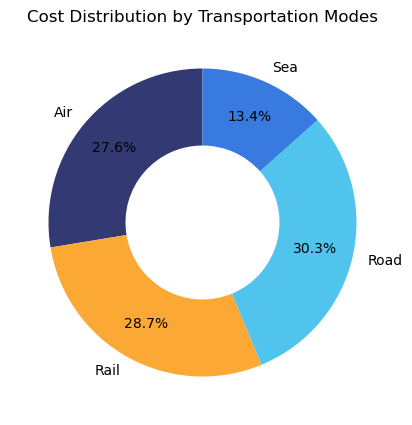

In [135]:
colors=['#333A73','#FBA834','#50C4ED','#387ADF']
Tcosts=df.groupby('Transportation modes')['Costs'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.pie(Tcosts['Costs'],labels=Tcosts['Transportation modes'],
        autopct='%1.1f%%',startangle=90 ,colors=colors ,wedgeprops=dict(width=0.5),pctdistance=0.75 )
plt.title('Cost Distribution by Transportation Modes')
plt.show()

### Road and Rail transportation methods are more expensive for the company compared to other forms of transport.

## **Analyzing Defect Rate**

### **Average Defect Rate by Product Type**

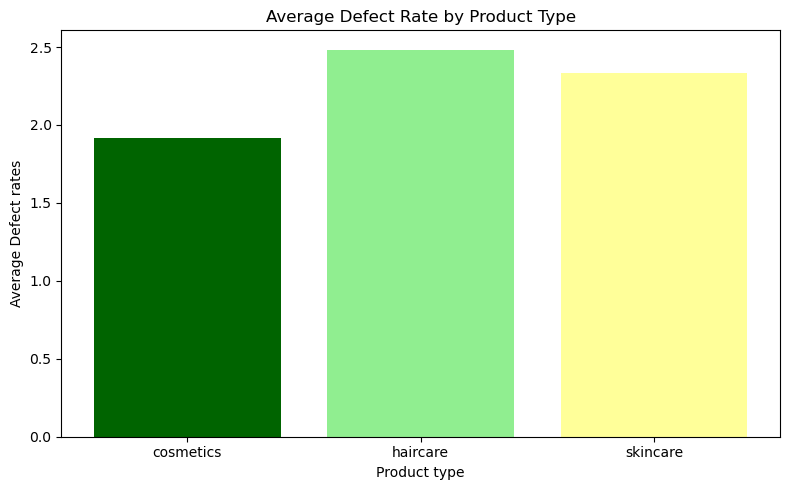

In [142]:
colors=['#006400','#90EE90','#FFFF99']
avg_defect=df.groupby('Product type')['Defect rates'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.bar(avg_defect['Product type'],avg_defect['Defect rates'], color=colors)
plt.xlabel('Product type')
plt.ylabel('Average Defect rates')
plt.title('Average Defect Rate by Product Type')
plt.tight_layout()
plt.show()

### The defect rate for haircare products is the highest one.

### **Defect Rate by Transportation Mode**

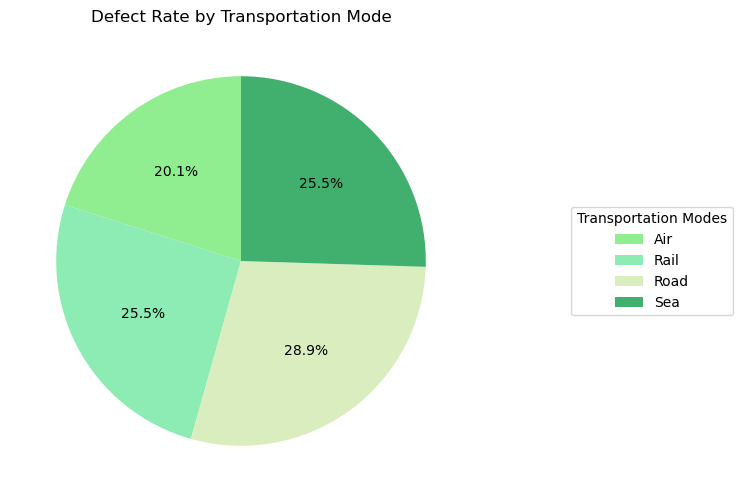

In [147]:
colors=['#90EE90','#8DECB4','#D9EDBF','#41B06E']
T_defect=df.groupby('Transportation modes')['Defect rates'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(T_defect['Defect rates'], 
        labels=None, 
        autopct='%1.1f%%',startangle=90, colors=colors,labeldistance=1.1)
plt.title('Defect Rate by Transportation Mode')
plt.legend(T_defect['Transportation modes'], title="Transportation Modes", loc="center left",bbox_to_anchor=(1.2, 0.5))
plt.show()

### Products delivered by road have the highest chance of being defective, while products delivered by air have the lowest rate of defects.

### **"Revenue vs. Manufacturing Scatter Plot"**

Coefficients:  [[-0.00226982]]
Intercept:  [60.37727428]
R-squared: 0.0458067325432433


Text(0.5, 1.0, 'Revenue vs Manufacturing Costs with Regression Line')

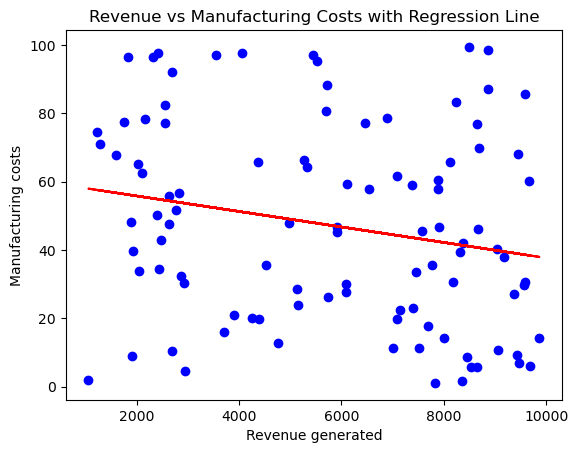

In [169]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['Revenue generated']])
train_y = np.asanyarray(df[['Manufacturing costs']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

y_pred = regr.predict(train_x)
r2 = r2_score(train_y, y_pred)

print("R-squared:", r2)

plt.scatter(df[['Revenue generated']], df[['Manufacturing costs']],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Revenue generated')
plt.ylabel("Manufacturing costs")
plt.title('Revenue vs Manufacturing Costs with Regression Line')

### Based on the linear regression analysis shown in the image, the R-squared value of 0.0458 indicates that the relationship between Manufacturing and Revenue is very weak. It also showed that all the tested data gave the same result..